# Логистическая регрессия

Логистическая регрессия обучается на переменныой, которая является бинарной (1 или 0) или категориальной (целое число). Результат регрессии - непрерывная переменная в виде вероятности, но ее можно преобразовать в дискретную величину с помощью порогового значения.

### Логистическая функция

**Логистическая функция** - это S-образная кривая (также известная как *сигмоида*), которая в зависимости от значений входных переменнных принимает значения между 0 и 1. Посколько выходная переменная лежит в интервале от 0 до 1, с ее помощью можно представлять вероятность.

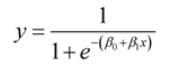

где:
    x - независимая переменная
    B0 и B1 - коэффициенты регрессии, которые нужно найти.

**B0** - ордината пересечения вышеупомянутой линейной функции с осью Y (коэффициент b в простой линейной регресии), **B1** - ее угловой коэффициент (то же, что m в простой линейной регресии).

In [ ]:
# Логистическая функция одного аргумента в Python
import math

def predict_probability(x, b0, b1):
    p = 1.0 / (1.0 + math.exp(-(b0+ b1 * x)))

1.0/(1.0 + 16.8272567955368*exp(-0.62*x))


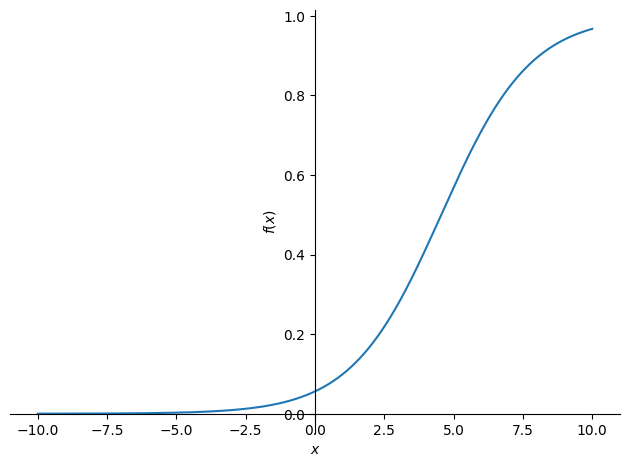

In [2]:
# Построение графика логистической функции с помощью Sympy
from sympy import *
b0, b1, x = symbols('b0 b1 x')

p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))

p = p.subs(b0, -2.823)
p = p.subs(b1, 0.620)
print(p)

plot(p)



In [3]:
# Простая логистическая регрессия с помощью scikit-learn
import pandas as pd
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("https://bit.ly/33ebs2R", delimiter=",")

X = df.values[:, :-1]
Y = df.values[:, -1]

# Отключаем штраф (penalty)
model = LogisticRegression(penalty=None)
model.fit(X, Y)

print(model.coef_.flatten()[0])
print(model.intercept_.flatten()[0])



0.692689386308558
-3.1758050425633764


In [9]:
# Градиентный спуск для логистической регрессии
from sympy import *
import pandas as pd

points = list(pd.read_csv("https://tinyurl.com/y2cocoo7").itertuples())

b1, b0, i, n = symbols('b1 b0 i n')
x, y = symbols('x y', cls=Function)

joint_likelihood = Sum(log((1.0 / (1.0 + exp(-(b0 + b1 * x(i))))) ** y(i) \
 * (1.0 - (1.0 / (1.0 + exp(-(b0 + b1 * x(i)))))) ** (1 - y(i))), (i, 0, n))

d_b1 = diff(joint_likelihood, b1) \
    .subs(n, len(points) - 1).doit() \
    .replace(x, lambda i: points[i].x) \
    .replace(y, lambda i: points[i].y)

d_b0 = (
    diff(joint_likelihood, b0)
    .subs(n, len(points) - 1).doit()
    .replace(x, lambda i: points[i].x)
    .replace(y, lambda i: points[i].y)
)

d_b1 = lambdify([b1, b0], d_b1)
d_b0 = lambdify([b1, b0], d_b0)

b1 = 0.01
b0 = 0.01
L = 0.01

for j in range(10_000):
    b1 += d_b1(b1, b0) * L
    b0 += d_b0(b1, b0) * L

print(b1, b0)


0.6926693075370812 -3.175751550409821


### Многомерная регрессия

**Пример:** Дано 54 записи из вымышленного набора данных о занятости сотрудников и текучести кадров.

Мы хотим:

    **Спрогнозировать, собираются ли увольняться другие сотрудники?**

In [19]:
# Многомерная логистическая регрессия на данных о сотрудниках
import pandas as pd
from sklearn.linear_model import LogisticRegression

employee_data = pd.read_csv("https://tinyurl.com/y6r7qjrp")

inputs = employee_data.iloc[:, :-1].to_numpy()

output = employee_data.iloc[:, -1].to_numpy()

fit = LogisticRegression(penalty=None).fit(inputs, output)

print(f"Угловые коэффициенты: {fit.coef_.flatten()}")
print(f"Пересечение: {fit.intercept_.flatten()}")

# Функция для интерактивного прогнозирования об увольнении новых сотрудников
def predict_employee_will_stay(sex, age, promotions, years_employed):
    prediction = fit.predict([[sex, age, promotions, years_employed]])
    probabilities = fit.predict_proba([[sex, age, promotions, years_employed]])
    if prediction == [[1]]:
        return f"Увилится: {probabilities}"
    else:
        return f"Останется: {probabilities}"
    
# Проверяем прогнозирование
while True:
    n = input("Прогнозируем, останется ли сотрудник или уйдет.\n" \
    "Введите данные (целые неотрицательные числа) через запятую:\n" \
    "пол, возраст, количество повышений, стаж работы (лет): ")
    (sex, age, promotions, years_employed) = n.split(",")
    print(predict_employee_will_stay(int(sex), int(age), int(promotions), int(years_employed)))

Угловые коэффициенты: [ 0.03216405  0.03683014 -2.50414075  0.97423186]
Пересечение: [-2.73503136]
Останется: [[9.99973769e-01 2.62309417e-05]]


ValueError: not enough values to unpack (expected 4, got 1)